In [1]:
import numpy as np

In [2]:
from scipy.interpolate import interp1d

In [3]:
falling = 2
start = -np.pi
end = np.pi/falling
x1 = np.linspace(start, 0, 50)
x2 = np.linspace(0, end, 40)
x2_edge = np.linspace(end, np.pi, 10)
s1 = np.cos(x1)
s2 = np.cos(falling*x2)
s2_edge = [-1]*10
x = np.hstack([x1, x2, x2_edge]) / np.pi
s = np.hstack([s1, s2, s2_edge])
f_peak = interp1d(x, s)

In [22]:
DURATION_SAMPLE = 1
xn = np.linspace(-DURATION_SAMPLE, DURATION_SAMPLE, 100)
sn = f_peak(xn)

In [5]:
import matplotlib

In [6]:
from matplotlib.pyplot import plot

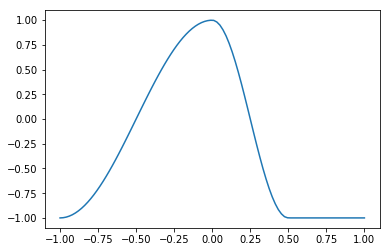

In [7]:
plot(xn, sn)

In [18]:
times = [0.4876190476190476, 0.9520181405895691, 1.4164172335600906, 1.9040362811791383, 2.36843537414966, 2.8328344671201813, 3.297233560090703, 3.7616326530612243, 4.2260317460317465, 4.713650793650793, 5.178049886621316, 5.642448979591837, 6.106848072562358, 6.5712471655328795, 7.035646258503402, 7.523265306122449, 7.987664399092971, 8.452063492063493, 8.916462585034013, 9.404081632653062, 9.868480725623582, 10.332879818594105, 10.797278911564625, 11.261678004535147, 11.749297052154194, 12.213696145124716, 12.678095238095239, 13.142494331065759, 13.606893424036281, 14.094512471655328]

In [84]:
yn = np.zeros(int(times[-1])*101) -1

In [85]:
tn = [x/100. for x in range(int(times[-1])*101)]

In [86]:
for i_time, time in enumerate(times):
    if time > DURATION_SAMPLE:
        i_center = int(100*time)
        i_left = i_center - 100*DURATION_SAMPLE
        for j in range(len(sn)):
            yn[i_left + j] = (1 + max(sn[j], yn[i_left + j]))/2.

for i in range(len(yn)):
    yn[i] = max(0, yn[i])

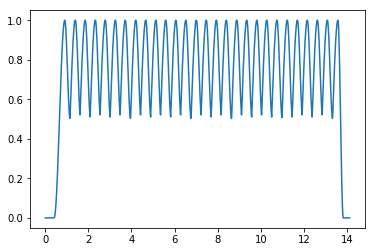

In [88]:
plot(tn[:5000], yn[:5000])